# Exploratory Data Analysis (EDA)

Comprehensive exploratory data analysis of the employee dataset using R.

This notebook runs the R script: `scripts/r/eda.R`

In [1]:
# Load required libraries
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)
if (requireNamespace("VIM", quietly = TRUE)) {
  library(VIM)
}
library(corrplot)

# Set working directory to project root
if (basename(getwd()) == "r" && basename(dirname(getwd())) == "notebooks") {
  setwd(dirname(dirname(getwd())))
} else if (basename(getwd()) == "notebooks") {
  setwd(dirname(getwd()))
}

# Create results directories
dir.create("results/plots", recursive = TRUE, showWarnings = FALSE)
dir.create("data/processed", recursive = TRUE, showWarnings = FALSE)

cat("===============================================================================\n")
cat("EXPLORATORY DATA ANALYSIS - EMPLOYEE DATASET\n")
cat("===============================================================================\n")
cat("Working directory:", getwd(), "\n")

Warning message:
"package 'ggplot2' was built under R version 4.5.2"
Warning message:
"package 'stringr' was built under R version 4.5.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'VIM' was built under R version 4.5.2"
Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

   

EXPLORATORY DATA ANALYSIS - EMPLOYEE DATASET
Working directory: c:/Users/fresh/Desktop/DATA SCIENCE_&_PREDICTIVE ANALYTICS/emplyees 


## 1. Data Loading


In [ ]:
# Load the dataset
df <- read.csv("data/raw/employees.csv", stringsAsFactors = FALSE, check.names = FALSE)
cat("Dataset shape:", nrow(df), "rows,", ncol(df), "columns\n")
cat("Columns:", paste(colnames(df), collapse = ", "), "\n")
head(df, 10)


Dataset shape: 1000 rows, 8 columns
Columns: First.Name, Gender, Start.Date, Last.Login.Time, Salary, Bonus.., Senior.Management, Team 


,First.Name,Gender,Start.Date,Last.Login.Time,Salary,Bonus..,Senior.Management,Team
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,true,Marketing
2,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,true,
3,Maria,Female,4/23/1993,11:17 AM,130590,11.858,false,Finance
4,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,true,Finance
5,Larry,Male,1/24/1998,4:47 PM,101004,1.389,true,Client Services
6,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,false,Legal
7,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,true,Product
8,,Female,7/20/2015,10:43 AM,45906,11.598,,Finance
9,Angela,Female,11/22/2005,6:29 AM,95570,18.523,true,Engineering


## 2. Data Overview


In [3]:
# Data types and basic information
str(df)
summary(df)


'data.frame':	1000 obs. of  8 variables:
 $ First.Name       : chr  "Douglas" "Thomas" "Maria" "Jerry" ...
 $ Gender           : chr  "Male" "Male" "Female" "Male" ...
 $ Start.Date       : chr  "8/6/1993" "3/31/1996" "4/23/1993" "3/4/2005" ...
 $ Last.Login.Time  : chr  "12:42 PM" "6:53 AM" "11:17 AM" "1:00 PM" ...
 $ Salary           : int  97308 61933 130590 138705 101004 115163 65476 45906 95570 139852 ...
 $ Bonus..          : num  6.95 4.17 11.86 9.34 1.39 ...
 $ Senior.Management: chr  "true" "true" "false" "true" ...
 $ Team             : chr  "Marketing" "" "Finance" "Finance" ...


  First.Name           Gender           Start.Date        Last.Login.Time   
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     Salary          Bonus..       Senior.Management      Team          
 Min.   : 35013   Min.   : 1.015   Length:1000        Length:1000       
 1st Qu.: 62613   1st Qu.: 5.402   Class :character   Class :character  
 Median : 90428   Median : 9.838   Mode  :character   Mode  :character  
 Mean   : 90662   Mean   :10.208                                        
 3rd Qu.:118740   3rd Qu.:14.838                                        
 Max.   :149908   Max. 

## 3. Missing Values Analysis


[1] Column        Missing_Count Percentage   
<0 rows> (or 0-length row.names)

 Variables sorted by number of missings: 
          Variable Count
        First.Name     0
            Gender     0
        Start.Date     0
   Last.Login.Time     0
            Salary     0
           Bonus..     0
 Senior.Management     0
              Team     0


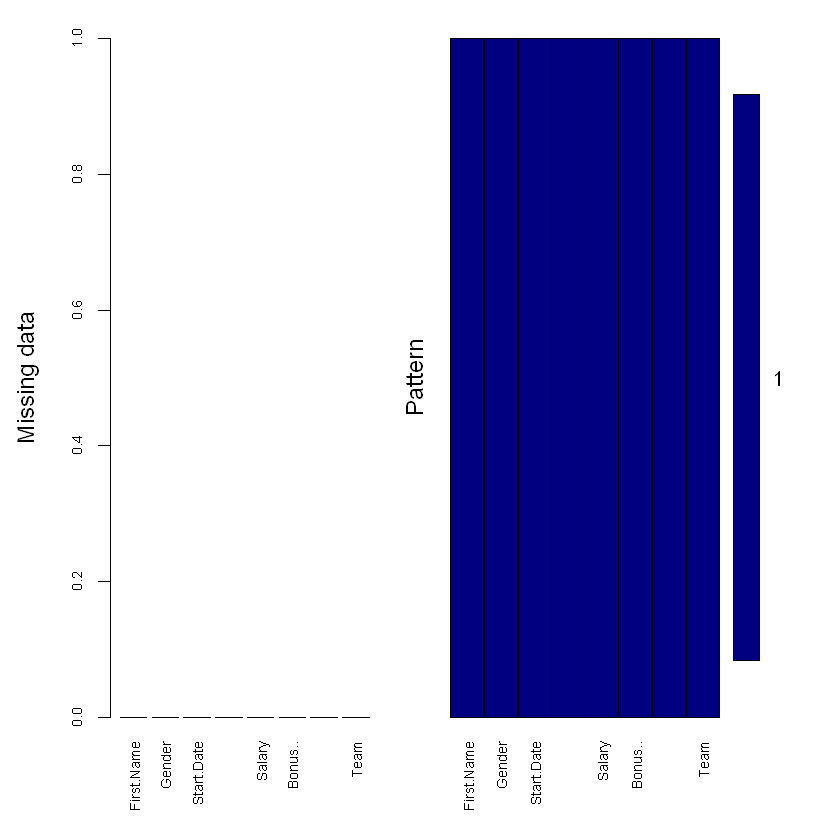

In [4]:
# Analyze missing values
missing_data <- colSums(is.na(df))
missing_percent <- (missing_data / nrow(df)) * 100
missing_df <- data.frame(
  Column = names(missing_data),
  Missing_Count = missing_data,
  Percentage = missing_percent
)
missing_df <- missing_df[missing_df$Missing_Count > 0, ]
missing_df <- missing_df[order(-missing_df$Missing_Count), ]
print(missing_df)

# Visualize missing values
if (requireNamespace("VIM", quietly = TRUE)) {
  VIM::aggr(df, col = c('navyblue', 'red'), numbers = TRUE, sortVars = TRUE, 
           labels = names(df), cex.axis = 0.7, gap = 3, ylab = c("Missing data", "Pattern"))
} else {
  missing_counts <- colSums(is.na(df))
  barplot(missing_counts[missing_counts > 0], main = "Missing Values by Column",
          xlab = "Column", ylab = "Missing Count", las = 2, col = "steelblue")
}


## 4. Data Cleaning and Preprocessing


In [5]:
# Create a copy for cleaning
df_clean <- df

# Rename columns for easier handling
colnames(df_clean) <- gsub(" ", "_", colnames(df_clean))
colnames(df_clean) <- gsub("%", "pct", colnames(df_clean))

# Handle missing values in First Name
df_clean$First_Name[is.na(df_clean$First_Name)] <- "Unknown"

# Handle missing values in Gender
cat("Gender distribution before cleaning:\n")
print(table(df_clean$Gender, useNA = "always"))

# Handle missing values in Senior Management (convert to boolean)
df_clean$Senior_Management <- ifelse(df_clean$Senior_Management == "true", TRUE, 
                                     ifelse(df_clean$Senior_Management == "false", FALSE, FALSE))
df_clean$Senior_Management[is.na(df_clean$Senior_Management)] <- FALSE

# Handle missing values in Team
df_clean$Team[is.na(df_clean$Team) | df_clean$Team == ""] <- "Unknown"

# Parse Start Date
df_clean$Start_Date <- as.Date(df_clean$Start_Date, format = "%m/%d/%Y")
df_clean$Start_Year <- year(df_clean$Start_Date)
df_clean$Start_Month <- month(df_clean$Start_Date)
df_clean$Years_of_Service <- as.numeric(difftime(Sys.Date(), df_clean$Start_Date, units = "days")) / 365.25

# Parse Last Login Time (extract hour)
df_clean$Last_Login_Time <- as.POSIXct(df_clean$Last_Login_Time, format = "%I:%M %p")
df_clean$Last_Login_Hour <- hour(df_clean$Last_Login_Time)

# Ensure numeric columns are numeric
df_clean$Salary <- as.numeric(df_clean$Salary)
df_clean$Bonus_pct <- as.numeric(df_clean$Bonus_pct)

# Remove rows with missing critical data (Salary)
df_clean <- df_clean[!is.na(df_clean$Salary), ]

cat("\nDataset shape after cleaning:", nrow(df_clean), "rows,", ncol(df_clean), "columns\n")
cat("Rows removed:", nrow(df) - nrow(df_clean), "\n")

# Save cleaned dataset
write.csv(df_clean, "data/processed/employees_cleaned.csv", row.names = FALSE)
cat("Cleaned dataset saved to: data/processed/employees_cleaned.csv\n")


ERROR: Error in `$<-.data.frame`(`*tmp*`, First_Name, value = character(0)): replacement has 0 rows, data has 1000


## 5. Numerical Variable Analysis


In [ ]:
# Analyze numerical variables
numerical_cols <- c("Salary", "Bonus_pct", "Years_of_Service")
cat("Descriptive Statistics:\n")
print(summary(df_clean[numerical_cols]))

# Distribution plots for numerical variables
par(mfrow = c(2, 3))
for (col in numerical_cols) {
  # Histogram
  hist(df_clean[[col]], breaks = 50, main = paste("Distribution of", col), 
       xlab = col, col = "steelblue", border = "black")
  # Box plot
  boxplot(df_clean[[col]], main = paste("Box Plot of", col), ylab = col, col = "lightblue")
}
par(mfrow = c(1, 1))


## 6. Categorical Variable Analysis


In [ ]:
# Analyze categorical variables
categorical_cols <- c("Gender", "Senior_Management", "Team")

for (col in categorical_cols) {
  cat("\n", col, "distribution:\n")
  print(table(df_clean[[col]], useNA = "always"))
  cat("Unique values:", length(unique(df_clean[[col]])), "\n")
}

# Visualize categorical variables
par(mfrow = c(1, 3))

# Gender distribution
gender_counts <- table(df_clean$Gender)
barplot(gender_counts, main = "Gender Distribution", xlab = "Gender", ylab = "Count", 
        col = c("skyblue", "pink", "lightgray"))

# Senior Management distribution
sm_counts <- table(df_clean$Senior_Management)
barplot(sm_counts, main = "Senior Management Distribution", xlab = "Senior Management", 
        ylab = "Count", col = c("lightcoral", "lightgreen"), names.arg = c("False", "True"))

# Team distribution (top 10)
team_counts <- head(sort(table(df_clean$Team), decreasing = TRUE), 10)
barplot(team_counts, main = "Top 10 Teams by Employee Count", xlab = "Count", 
        ylab = "Team", col = "steelblue", horiz = TRUE, las = 1)
par(mfrow = c(1, 1))


## 7. Outlier Detection


In [ ]:
# Detect outliers using IQR method
for (col in numerical_cols) {
  Q1 <- quantile(df_clean[[col]], 0.25, na.rm = TRUE)
  Q3 <- quantile(df_clean[[col]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  outliers <- sum(df_clean[[col]] < lower_bound | df_clean[[col]] > upper_bound, na.rm = TRUE)
  cat("\n", col, "outliers:", outliers, "(", round(outliers/nrow(df_clean)*100, 2), "%)\n")
  cat("  Lower bound:", round(lower_bound, 2), ", Upper bound:", round(upper_bound, 2), "\n")
}

# Visualize outliers
par(mfrow = c(1, 3))
for (col in numerical_cols) {
  boxplot(df_clean[[col]], main = paste("Outliers in", col), ylab = col, col = "lightcoral")
}
par(mfrow = c(1, 1))


## 8. Correlation Analysis


In [ ]:
# Calculate correlation matrix
correlation_matrix <- cor(df_clean[numerical_cols], use = "complete.obs")
cat("Correlation Matrix:\n")
print(correlation_matrix)

# Visualize correlation matrix
corrplot(correlation_matrix, method = "color", type = "upper", order = "hclust", 
         tl.cex = 0.8, tl.col = "black", tl.srt = 45)


## 9. Relationship Analysis


In [ ]:
# Analyze relationships between variables
par(mfrow = c(2, 2))

# Salary by Gender
boxplot(Salary ~ Gender, data = df_clean, main = "Salary Distribution by Gender", 
        xlab = "Gender", ylab = "Salary", col = c("skyblue", "pink", "lightgray"))

# Salary by Senior Management
boxplot(Salary ~ Senior_Management, data = df_clean, main = "Salary Distribution by Senior Management", 
        xlab = "Senior Management", ylab = "Salary", col = c("lightcoral", "lightgreen"))

# Salary by Team (top 10 teams)
top_teams <- names(head(sort(table(df_clean$Team), decreasing = TRUE), 10))
df_top_teams <- df_clean[df_clean$Team %in% top_teams, ]
boxplot(Salary ~ Team, data = df_top_teams, main = "Salary Distribution by Team (Top 10)", 
        xlab = "Team", ylab = "Salary", las = 2, col = "steelblue")

# Salary vs Bonus %
plot(df_clean$Salary, df_clean$Bonus_pct, main = "Salary vs Bonus %", 
     xlab = "Salary", ylab = "Bonus %", pch = 19, alpha = 0.5, col = "steelblue")
par(mfrow = c(1, 1))


## 10. Time Series Analysis (Hiring Trends)


In [ ]:
# Analyze hiring trends
# Hiring trends by year
hiring_by_year <- df_clean %>%
  group_by(Start_Year) %>%
  summarise(Count = n()) %>%
  filter(!is.na(Start_Year))

plot(hiring_by_year$Start_Year, hiring_by_year$Count, type = "o", 
     main = "Hiring Trends Over Years", xlab = "Year", ylab = "Number of Employees Hired", 
     pch = 19, col = "steelblue", lwd = 2)
grid()

# Hiring by month
hiring_by_month <- df_clean %>%
  group_by(Start_Month) %>%
  summarise(Count = n()) %>%
  filter(!is.na(Start_Month))

barplot(hiring_by_month$Count, names.arg = month.abb[hiring_by_month$Start_Month], 
        main = "Hiring Trends by Month", xlab = "Month", ylab = "Number of Employees Hired", 
        col = "steelblue", border = "black")
grid(nx = NA, ny = NULL)


## 11. Summary Statistics


In [ ]:
# Overall statistics
cat("Overall Statistics:\n")
cat("Total employees:", nrow(df_clean), "\n")
cat("Average salary: $", round(mean(df_clean$Salary, na.rm = TRUE), 2), "\n", sep = "")
cat("Median salary: $", round(median(df_clean$Salary, na.rm = TRUE), 2), "\n", sep = "")
cat("Average bonus %:", round(mean(df_clean$Bonus_pct, na.rm = TRUE), 2), "%\n")
cat("Average years of service:", round(mean(df_clean$Years_of_Service, na.rm = TRUE), 2), "years\n")
cat("Senior management percentage:", round(sum(df_clean$Senior_Management, na.rm = TRUE) / nrow(df_clean) * 100, 2), "%\n")

# Gender statistics
cat("\nGender Statistics:\n")
print(df_clean %>%
  group_by(Gender) %>%
  summarise(Mean_Salary = mean(Salary, na.rm = TRUE),
            Median_Salary = median(Salary, na.rm = TRUE),
            Count = n()))

# Team statistics
cat("\nTop 5 Teams by Average Salary:\n")
print(df_clean %>%
  group_by(Team) %>%
  summarise(Mean_Salary = mean(Salary, na.rm = TRUE)) %>%
  arrange(desc(Mean_Salary)) %>%
  head(5))

cat("\n===============================================================================\n")
cat("EDA COMPLETED SUCCESSFULLY!\n")
cat("===============================================================================\n")
cat("\nResults saved in:\n")
cat("- Cleaned dataset: data/processed/employees_cleaned.csv\n")
cat("- Plots: results/plots/\n")
